In [1]:

import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px

import json
import jsonpickle
from json import JSONEncoder

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

from scipy import stats

C:\Users\sshah\PycharmProjects\PS_Direct_Events\venv\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.2.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
import requests

from bs4 import BeautifulSoup
import csv

#import config

from lxml import html

In [4]:
import sys
sys.path.append('../../')
import config as config

In [5]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [6]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [10]:
import yfinance as yf

In [8]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [11]:
tsla = yf.Ticker("TSLA")

In [12]:
tsla_share_price_data = tsla.history(period="max")

In [13]:
tsla_share_price_data.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [14]:
tsla_share_price_data.reset_index(inplace=True)

In [15]:
tsla_share_price_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


<AxesSubplot: xlabel='Date'>

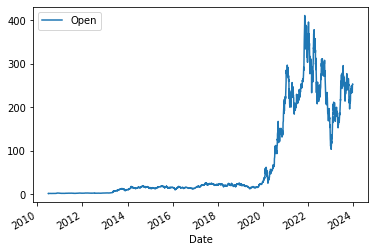

In [16]:
tsla_share_price_data.plot(x="Date", y="Open")

In [17]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'

In [18]:
data  = requests.get(url).text
soup = BeautifulSoup(data,"html.parser")

In [19]:
soup


<!DOCTYPE html>

<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<link href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" rel="canonical"/>
<title>Tesla Revenue 2010-2022 | TSLA | MacroTrends</title>
<meta content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2022. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&lt;ul style='margin-top:10px;'&gt;
				&lt;li&gt;Tesla revenue for the quarter ending September 30,

In [20]:
soup.find_all('tbody')[1]

<tbody>
<tr>
<td style="text-align:center">2022-09-30</td>
<td style="text-align:center">$21,454</td>
</tr>
<tr>
<td style="text-align:center">2022-06-30</td>
<td style="text-align:center">$16,934</td>
</tr>
<tr>
<td style="text-align:center">2022-03-31</td>
<td style="text-align:center">$18,756</td>
</tr>
<tr>
<td style="text-align:center">2021-12-31</td>
<td style="text-align:center">$17,719</td>
</tr>
<tr>
<td style="text-align:center">2021-09-30</td>
<td style="text-align:center">$13,757</td>
</tr>
<tr>
<td style="text-align:center">2021-06-30</td>
<td style="text-align:center">$11,958</td>
</tr>
<tr>
<td style="text-align:center">2021-03-31</td>
<td style="text-align:center">$10,389</td>
</tr>
<tr>
<td style="text-align:center">2020-12-31</td>
<td style="text-align:center">$10,744</td>
</tr>
<tr>
<td style="text-align:center">2020-09-30</td>
<td style="text-align:center">$8,771</td>
</tr>
<tr>
<td style="text-align:center">2020-06-30</td>
<td style="text-align:center">$6,036</td>


In [26]:
rev_table = soup.find_all('tbody')[1]

In [27]:
rev_table

<tbody>
<tr>
<td style="text-align:center">2022-09-30</td>
<td style="text-align:center">$21,454</td>
</tr>
<tr>
<td style="text-align:center">2022-06-30</td>
<td style="text-align:center">$16,934</td>
</tr>
<tr>
<td style="text-align:center">2022-03-31</td>
<td style="text-align:center">$18,756</td>
</tr>
<tr>
<td style="text-align:center">2021-12-31</td>
<td style="text-align:center">$17,719</td>
</tr>
<tr>
<td style="text-align:center">2021-09-30</td>
<td style="text-align:center">$13,757</td>
</tr>
<tr>
<td style="text-align:center">2021-06-30</td>
<td style="text-align:center">$11,958</td>
</tr>
<tr>
<td style="text-align:center">2021-03-31</td>
<td style="text-align:center">$10,389</td>
</tr>
<tr>
<td style="text-align:center">2020-12-31</td>
<td style="text-align:center">$10,744</td>
</tr>
<tr>
<td style="text-align:center">2020-09-30</td>
<td style="text-align:center">$8,771</td>
</tr>
<tr>
<td style="text-align:center">2020-06-30</td>
<td style="text-align:center">$6,036</td>


In [28]:
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

In [34]:
# First we isolate the body of the table which contains all the information
# Then we loop through each row and find all the column values for each row

for row in rev_table.find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    rev = col[1].text
    
    # Finally we append the data of each row to the table
    tesla_revenue = tesla_revenue.append({"Date":date, "Revenue":rev}, ignore_index=True)  

  

In [35]:
tesla_revenue.head()

,Date,Revenue
0,2022-09-30,"$21,454"
1,2022-06-30,"$16,934"
2,2022-03-31,"$18,756"
3,2021-12-31,"$17,719"
4,2021-09-30,"$13,757"


In [36]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

In [37]:
tesla_revenue.head()

,Date,Revenue
0,2022-09-30,21454
1,2022-06-30,16934
2,2022-03-31,18756
3,2021-12-31,17719
4,2021-09-30,13757


In [38]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [39]:
tesla_revenue.head()

,Date,Revenue
0,2022-09-30,21454
1,2022-06-30,16934
2,2022-03-31,18756
3,2021-12-31,17719
4,2021-09-30,13757


In [40]:
tesla_revenue.tail(5)

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


In [41]:
#gamestop data

gme = yf.Ticker("GME")

In [42]:
gme_share_price_data = gme.history(period="max")

In [44]:
gme_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [45]:
gme_share_price_data.reset_index(inplace=True)
gme_share_price_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [46]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'

In [47]:
gme_data  = requests.get(url).text
gme_soup = BeautifulSoup(gme_data,"html.parser")

In [49]:
gme_soup.find_all('tbody')[1]

<tbody>
<tr>
<td style="text-align:center">2020-04-30</td>
<td style="text-align:center">$1,021</td>
</tr>
<tr>
<td style="text-align:center">2020-01-31</td>
<td style="text-align:center">$2,194</td>
</tr>
<tr>
<td style="text-align:center">2019-10-31</td>
<td style="text-align:center">$1,439</td>
</tr>
<tr>
<td style="text-align:center">2019-07-31</td>
<td style="text-align:center">$1,286</td>
</tr>
<tr>
<td style="text-align:center">2019-04-30</td>
<td style="text-align:center">$1,548</td>
</tr>
<tr>
<td style="text-align:center">2019-01-31</td>
<td style="text-align:center">$3,063</td>
</tr>
<tr>
<td style="text-align:center">2018-10-31</td>
<td style="text-align:center">$1,935</td>
</tr>
<tr>
<td style="text-align:center">2018-07-31</td>
<td style="text-align:center">$1,501</td>
</tr>
<tr>
<td style="text-align:center">2018-04-30</td>
<td style="text-align:center">$1,786</td>
</tr>
<tr>
<td style="text-align:center">2018-01-31</td>
<td style="text-align:center">$2,825</td>
</tr>
<t

In [51]:
gme_rev_table = gme_soup.find_all('tbody')[1]

In [52]:
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

In [53]:
for row in gme_rev_table.find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    rev = col[1].text
    
    # Finally we append the data of each row to the table
    gme_revenue = gme_revenue.append({"Date":date, "Revenue":rev}, ignore_index=True)  


In [54]:
gme_revenue.head()

,Date,Revenue
0,2020-04-30,"$1,021"
1,2020-01-31,"$2,194"
2,2019-10-31,"$1,439"
3,2019-07-31,"$1,286"
4,2019-04-30,"$1,548"


In [55]:
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"")
gme_revenue.dropna(inplace=True)

gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]


In [56]:
gme_revenue.tail(5)

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


In [58]:
make_graph(tsla_share_price_data, tesla_revenue, 'Tesla Stock Price vs. Revenue')

In [59]:
make_graph(gme_share_price_data, gme_revenue, 'Gamestop Stock Price vs. Revenue')